<a href="https://colab.research.google.com/github/brunogtds/datavisualization_Python/blob/main/evolution_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd

%matplotlib inline 

In [ ]:
corona_brasil2= pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/corona_Brasil.csv')
corona_brasil2.data

0      2020-02-25
1      2020-02-26
2      2020-02-27
3      2020-02-28
4      2020-02-29
          ...    
317    2021-01-06
318    2021-01-07
319    2021-01-08
320    2021-01-09
321    2021-01-10
Name: data, Length: 322, dtype: object

In [ ]:
from datetime import datetime
corona_brasil= pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/corona_Brasil.csv')
corona_brasil.data= pd.to_datetime(corona_brasil.data, format="%Y-%m-%d", errors='coerce')

In [ ]:
corona_brasil.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9.0,210147125.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9.0,210147125.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9.0,210147125.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9.0,210147125.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9.0,210147125.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN


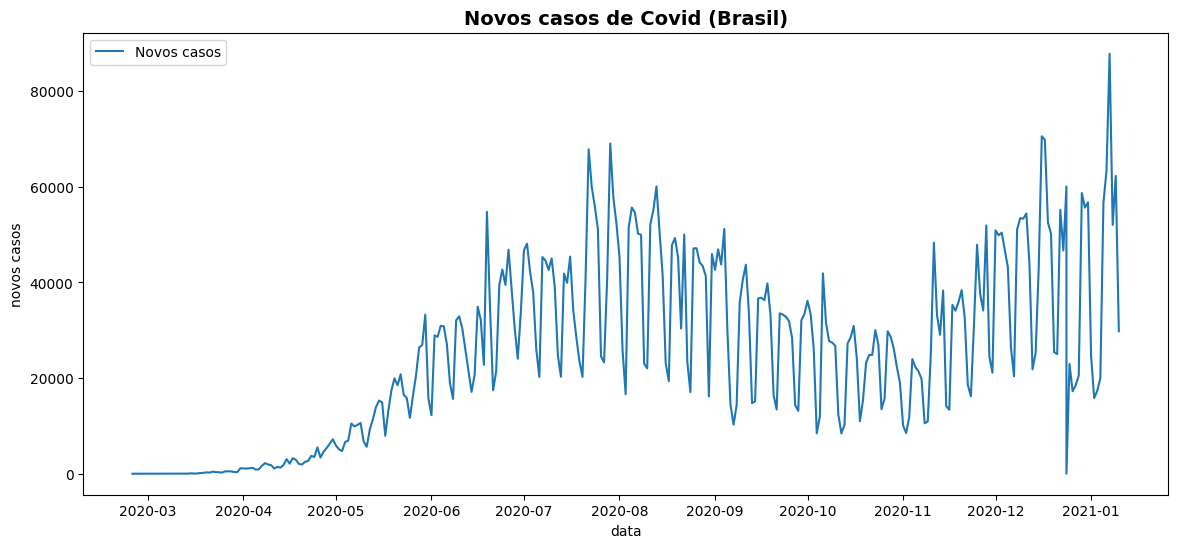

In [ ]:
fig, ax= plt.subplots(figsize=(14,6))
ax.plot(corona_brasil.data, corona_brasil.casosNovos, label='Novos casos')

ax.set_title('Novos casos de Covid (Brasil)', fontsize=14, weight='bold')
ax.set_xlabel('data')
ax.set_ylabel('novos casos')
ax.legend()
plt.show()

In [ ]:
bovespa= pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/mystocksn.csv')
bovespa.data= pd.to_datetime(bovespa.data, format='%Y-%m-%d', errors='coerce')
bovespa.head()

,data,IBOV,VALE3,PETR4,DOLAR
0,2020-02-27,102984.0,9.92,12.08,4.4491
1,2020-02-28,104172.0,9.82,12.10,4.4848
2,2020-03-02,106625.0,10.27,12.49,4.4413
3,2020-03-03,105537.0,10.22,12.16,4.4724
4,2020-03-04,107224.0,10.56,12.33,4.5132


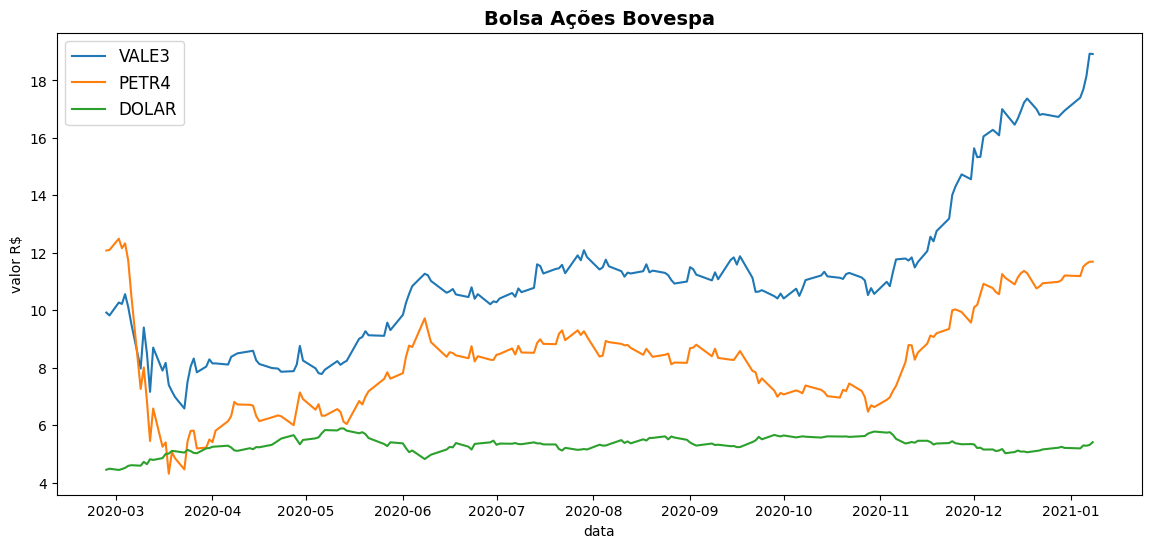

In [ ]:
fig, ax= plt.subplots(figsize=(14,6))
ax.plot(bovespa.data, bovespa.VALE3, label='VALE3')
ax.plot(bovespa.data, bovespa.PETR4, label='PETR4')
ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

ax.set_title('Bolsa Ações Bovespa', fontsize=14, weight='bold')
ax.set_xlabel('data')
ax.set_ylabel('valor R$')
ax.legend(fontsize=12)

In [ ]:
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pytrends.request import TrendReq
pytrend = TrendReq()

In [ ]:
pytrend.build_payload(kw_list=['Covid', 'Hotel', 'Netflix', 'Notebook'], cat=0, timeframe='2020-02-25 2023-03-20', geo='BR')
trends = pytrend.interest_over_time()

trends.head()

,Covid,Hotel,Netflix,Notebook,isPartial
date,,,,,
2020-03-01,1,20,16,7,False
2020-03-08,4,18,14,7,False
2020-03-15,27,10,30,9,False
2020-03-22,34,6,38,11,False
2020-03-29,31,6,33,11,False


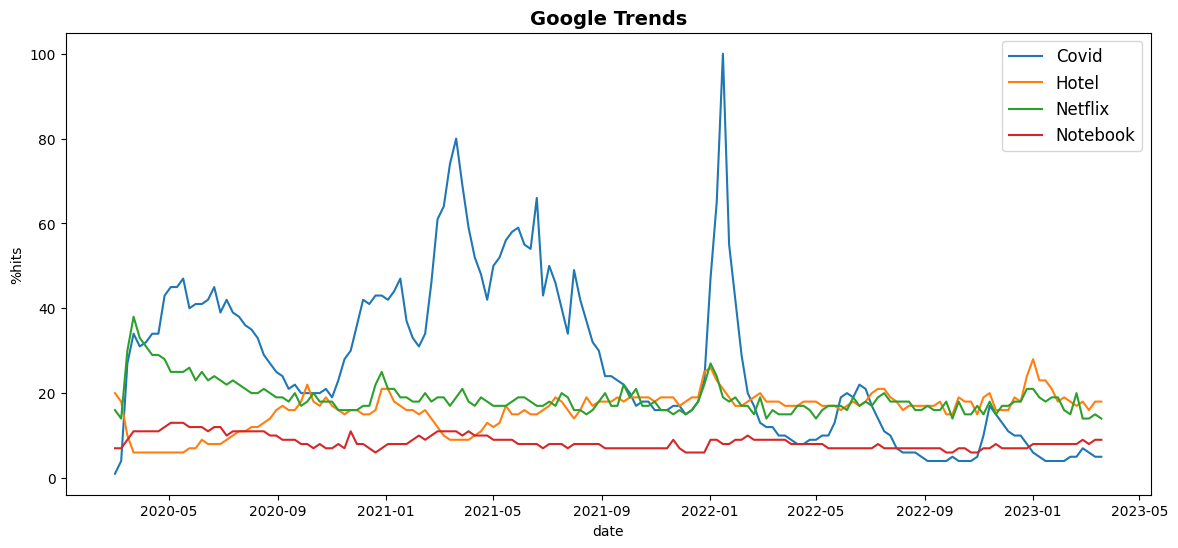

In [ ]:
fig, ax= plt.subplots(figsize=(14,6))

ax.plot(trends.index, trends.Covid, label='Covid')
ax.plot(trends.index, trends.Hotel, label='Hotel')
ax.plot(trends.index, trends.Netflix, label='Netflix')
ax.plot(trends.index, trends.Notebook, label='Notebook')

from datetime import datetime
ax.set_title('Google Trends', fontsize=14, weight='bold')
ax.set_xlabel('date')
ax.set_ylabel('%hits')

ax.legend(fontsize=12)
plt.show()

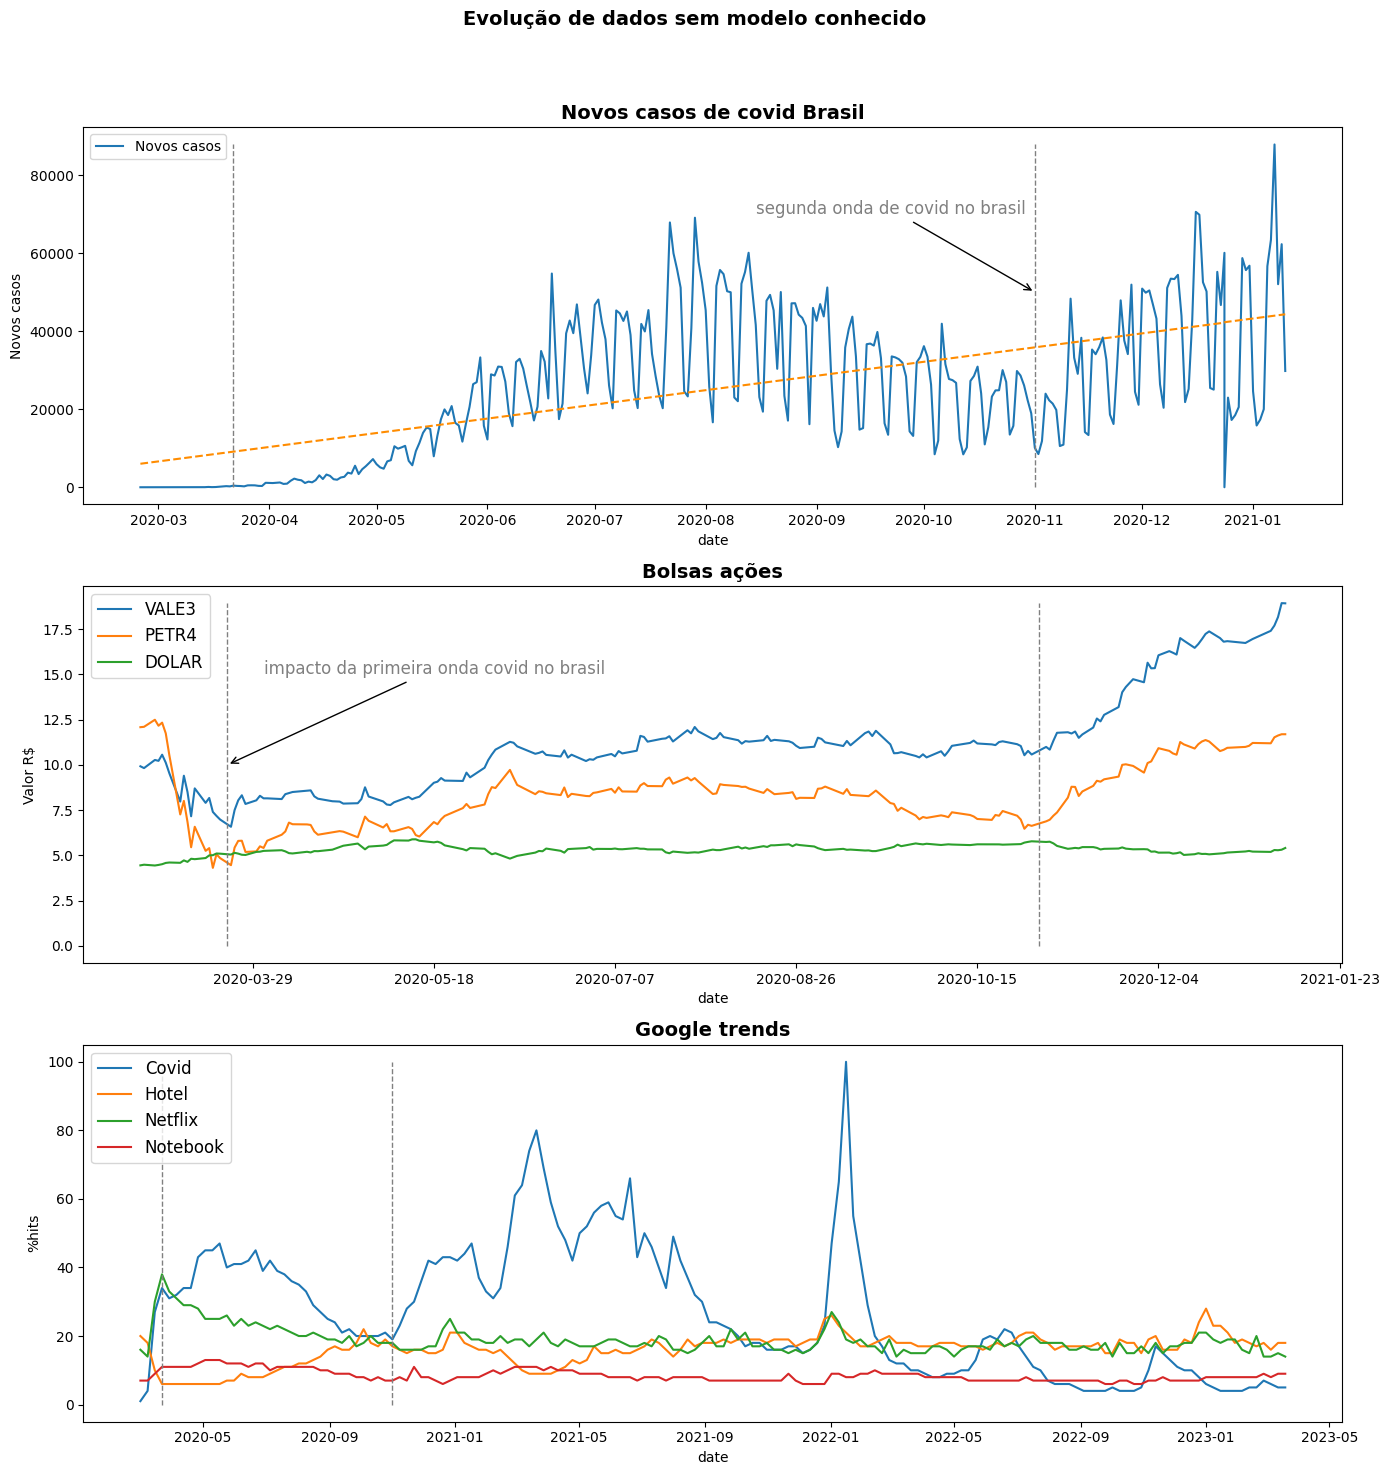

In [ ]:
fig, ax= plt.subplots(3,1,figsize=(14,15))
fig.suptitle('Evolução de dados sem modelo conhecido', fontsize=14, weight='bold')

ax[0].plot(corona_brasil.data, corona_brasil.casosNovos, label='Novos casos')

#linhas verticais

ax[0].vlines(datetime(2020, 3, 22), 0, corona_brasil.casosNovos.max(), linewidth=1, linestyle='--',colors='grey')
ax[0].vlines(datetime(2020, 11, 1),0,corona_brasil.casosNovos.max(),linewidth=1,linestyle='--',colors='grey')

ax[0].set_title('Novos casos de covid Brasil', fontsize=14, weight='bold')
ax[0].set_xlabel('date')
ax[0].set_ylabel('Novos casos')

import numpy as np
x= np.arange(0,len(corona_brasil),1)
z= np.polyfit(x, corona_brasil.casosNovos, 1)
p= np.poly1d(z)

ax[0].plot(corona_brasil.data, p(x), color='darkorange', linestyle='dashed')

#annotate

ax[0].annotate('segunda onda de covid no brasil', xy=(datetime(2020,11,1), 50000), xytext=(datetime(2020,8,15),70000),arrowprops=dict(arrowstyle="->"),fontsize=12,color='grey')
ax[0].legend()

ax[1].plot(bovespa.data, bovespa.VALE3, label='VALE3')
ax[1].plot(bovespa.data, bovespa.PETR4, label='PETR4')
ax[1].plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

ax[1].vlines(datetime(2020, 3, 22), 0, bovespa.VALE3.max(), linewidth=1, linestyle='--',colors='grey')
ax[1].vlines(datetime(2020, 11, 1),0,bovespa.VALE3.max(),linewidth=1,linestyle='--',colors='grey')

ax[1].set_title('Bolsas ações', fontsize=14, weight='bold')
ax[1].set_xlabel('date')
ax[1].set_ylabel('Valor R$')

#annotate

ax[1].annotate('impacto da primeira onda covid no brasil', xy=(datetime(2020,3,22), 10), xytext=(datetime(2020,4,1),15),arrowprops=dict(arrowstyle="->"),fontsize=12,color='grey')
ax[1].legend()

import matplotlib.ticker as ticker
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax[1].legend(fontsize=12)

ax[2].plot(trends.index, trends.Covid, label='Covid')
ax[2].plot(trends.index, trends.Hotel, label='Hotel')
ax[2].plot(trends.index, trends.Netflix, label='Netflix')
ax[2].plot(trends.index, trends.Notebook, label='Notebook')

ax[2].vlines(datetime(2020, 3, 22), 0, 100, linewidth=1, linestyle='--',colors='grey')
ax[2].vlines(datetime(2020, 11, 1),0, 100,linewidth=1,linestyle='--',colors='grey')

ax[2].set_title('Google trends', fontsize=14, weight='bold')
ax[2].set_xlabel('date')
ax[2].set_ylabel('%hits')

ax[2].legend()
plt.legend(loc='upper left', fontsize=12)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


In [ ]:
###linhas de tendência 


import seaborn as sns
df= sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [ ]:
#obter coeficientes de um polinio de grau qualquer que melhor aproxima um conjunto de pontos

z= np.polyfit(df.x, df.y, 1)
p= np.poly1d(z)

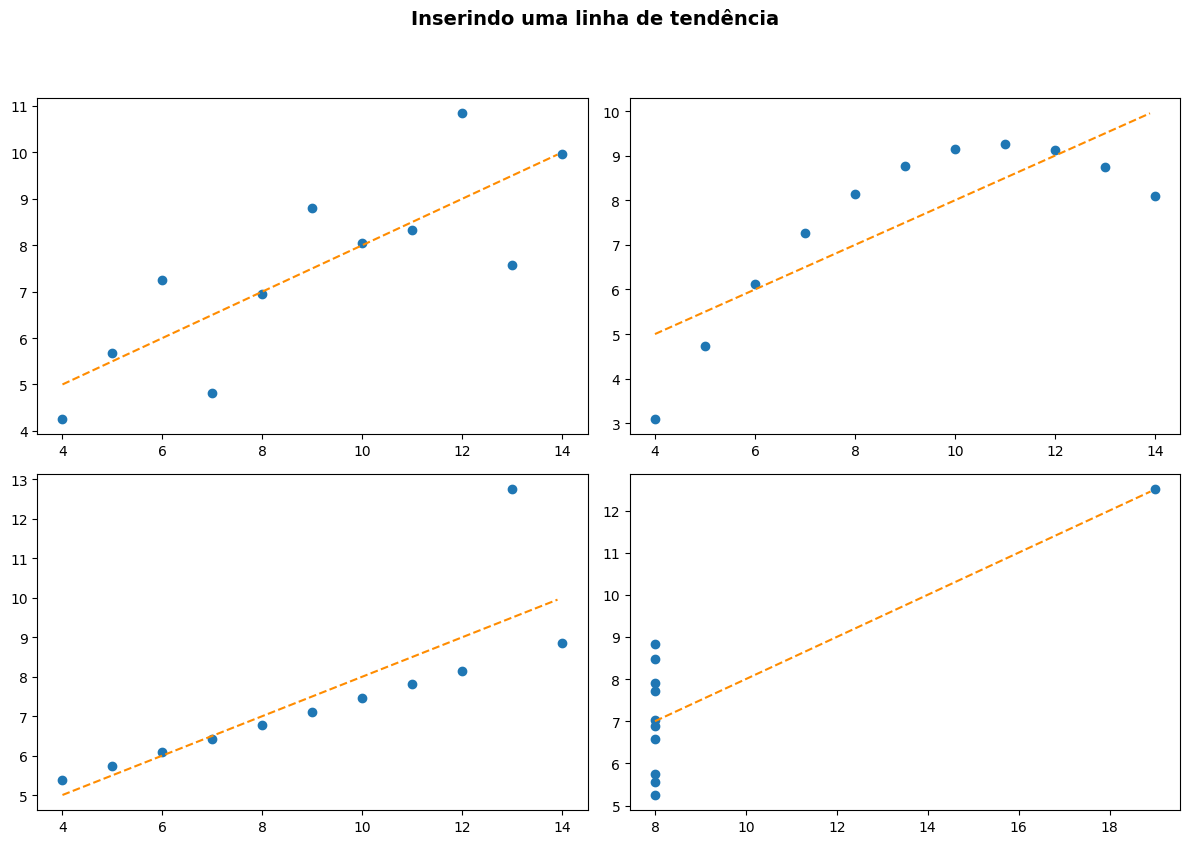

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,8))
fig.suptitle('Inserindo uma linha de tendência', fontsize=14, weight='bold', y=1.05)

i=0
for ds_type in  df.dataset.unique():
  ds = df[df.dataset == ds_type]

  z = np.polyfit(ds.x, ds.y, 1)
  p= np.poly1d(z)

  ax[i//2,i%2].scatter(ds.x, ds.y)

  x= np.arange(ds.x.min(), ds.x.max(), 0.1)
  ax[i//2,i%2].plot(x,p(x),color='darkorange',linestyle='dashed')
  i += 1

plt.tight_layout()
plt.show()

In [ ]:
####scipy -> pacote de python que emprega numpy, matploblib, entre outros

from scipy.optimize import curve_fit

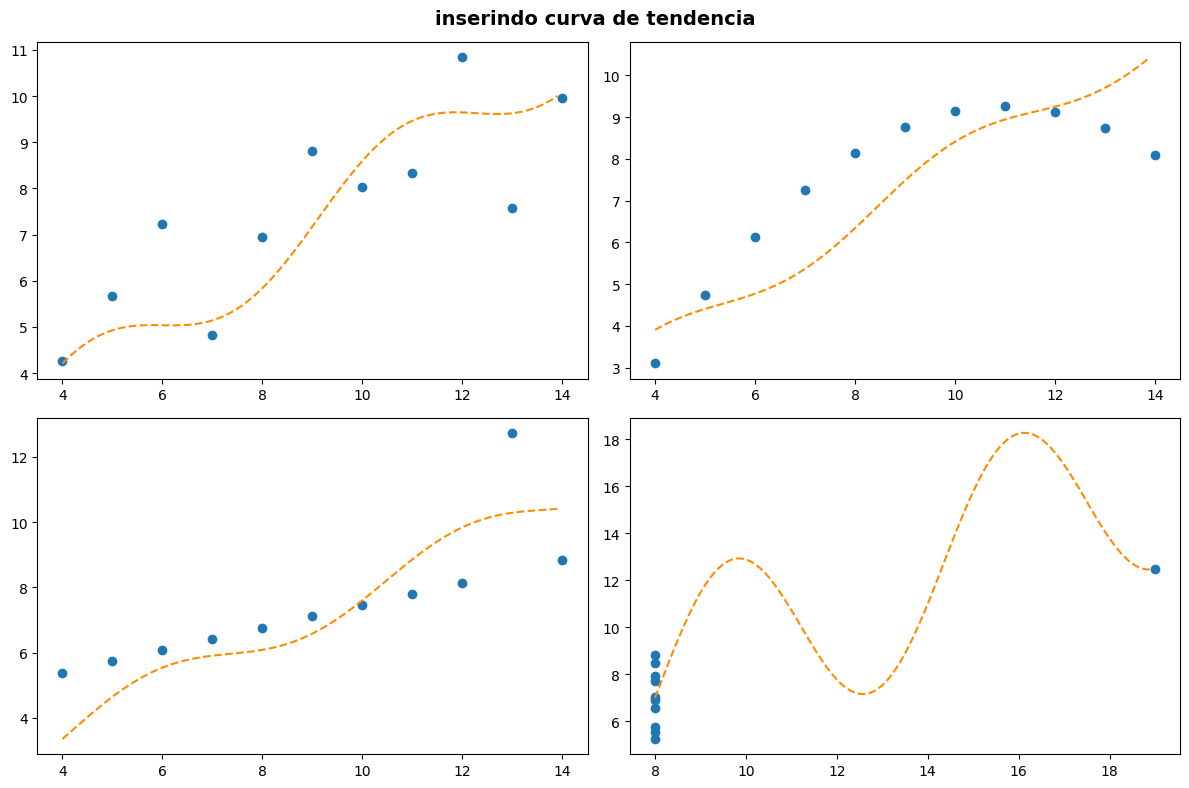

In [ ]:
def func (x, a, b, c):
  return a*np.sin(x) + b*np.cos(x) + x**c

fig, ax= plt.subplots(2,2,figsize=(12,8))
fig.suptitle('inserindo curva de tendencia', fontsize=14, weight='bold')

i=0

for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  popt, pcov= curve_fit(func, ds.x, ds.y)

  ax[i//2,i%2].scatter(ds.x,ds.y)

  x= np.arange(ds.x.min(), ds.x.max(),0.1)

  ax[i//2,i%2].plot(x,func(x,*popt),color='darkorange',linestyle='dashed')
  i += 1

plt.tight_layout()
plt.show()

<Axes: xlabel='x', ylabel='y'>

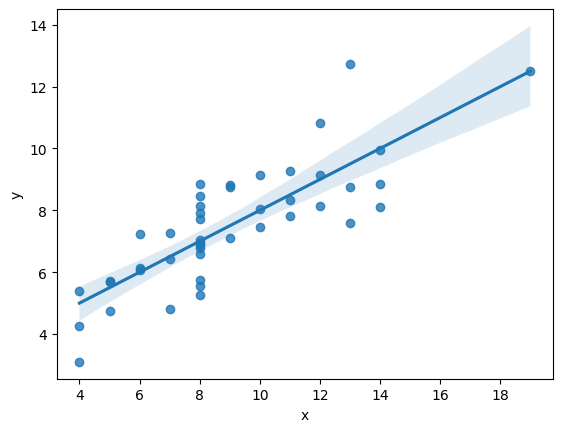

In [ ]:
sns.regplot(x='x', y='y', data=df)



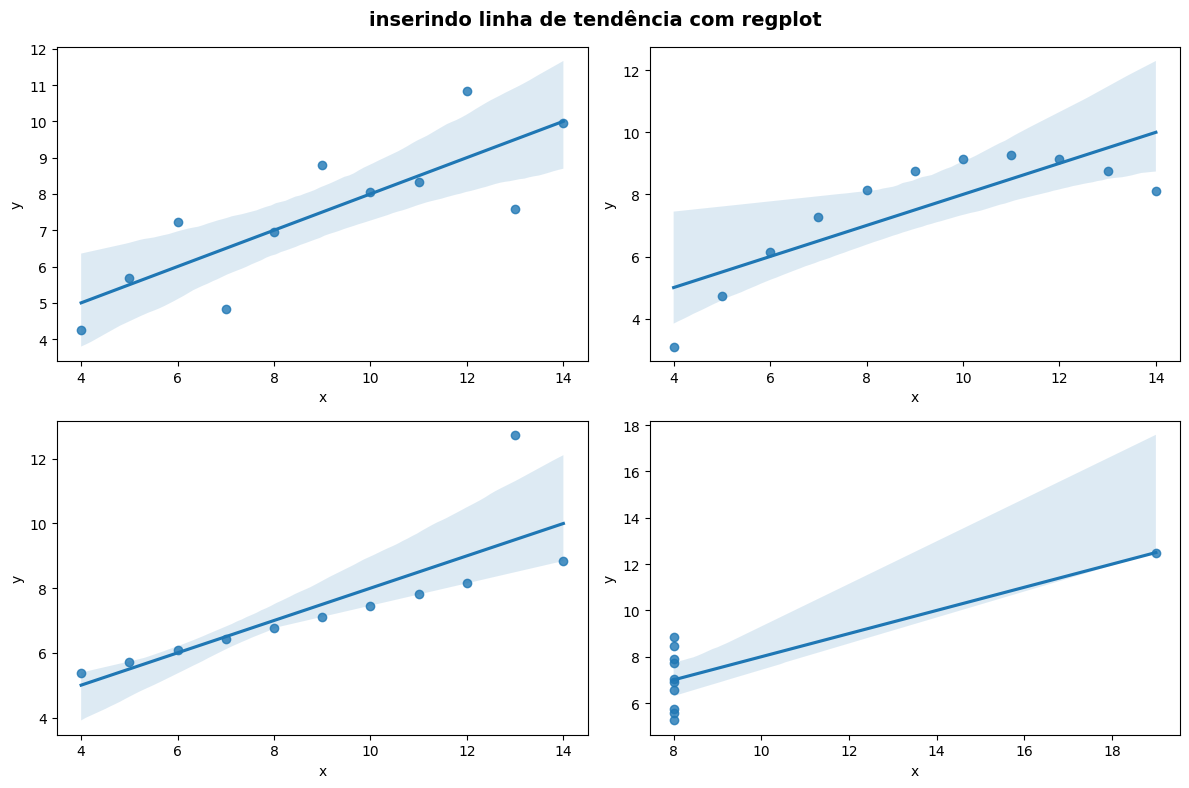

In [ ]:
fig, ax= plt.subplots(2,2,figsize=(12,8))
fig.suptitle('inserindo linha de tendência com regplot', fontsize=14, weight='bold')

i=0

for ds_type in df.dataset.unique():
  ds= df[df.dataset == ds_type]

  sns.regplot(x='x', y='y', data=ds, ax=ax[i//2,i%2])
  i += 1

plt.tight_layout()
plt.show()
                                        

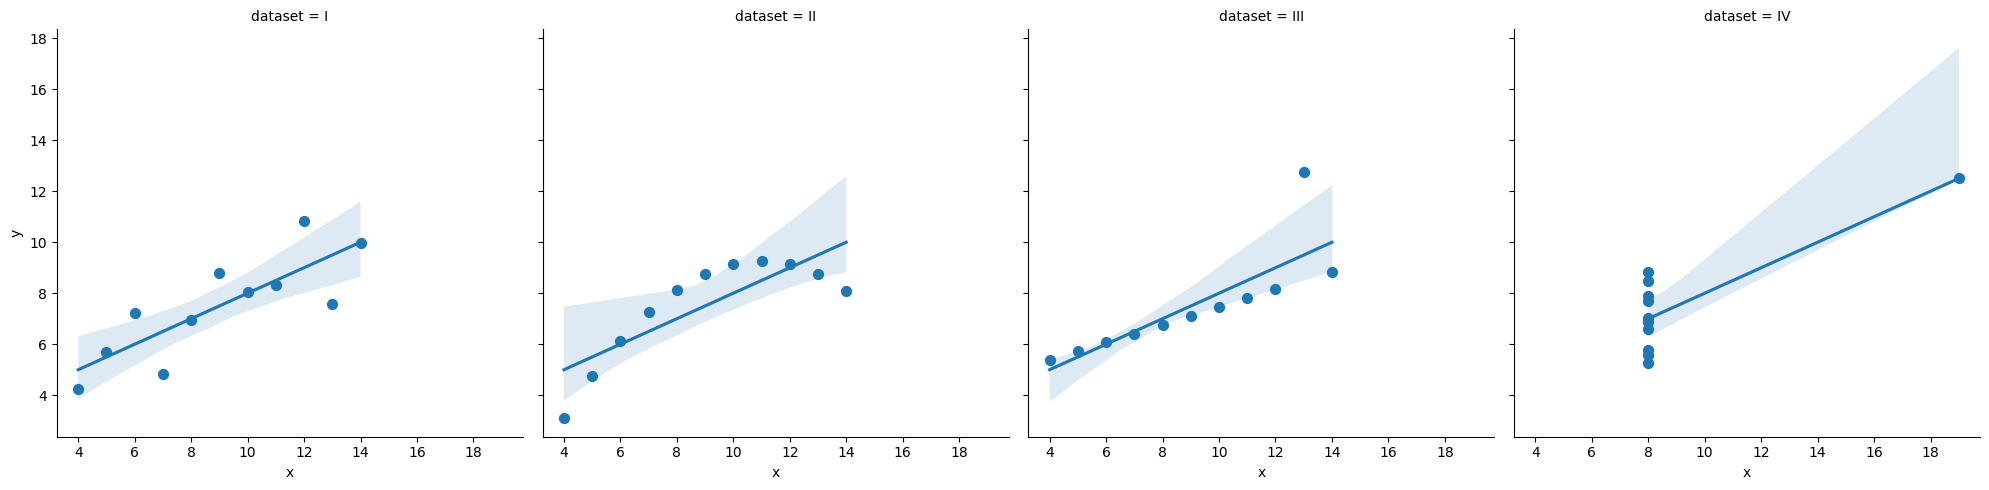

In [ ]:
import seaborn as  sns

sns.lmplot(x='x', y='y', col='dataset', data=df, scatter_kws={"s": 50, "alpha":  1}) #regplot + facetgrid
plt.show()

**linhas temporais**

In [ ]:
bovespa= pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/mystocksn.csv')
bovespa.data= pd.to_datetime(bovespa.data, format='%Y-%m-%d',errors='coerce') ##para ajustar o formato da data

In [ ]:
bovespa.head()

,data,IBOV,VALE3,PETR4,DOLAR
0,2020-02-27,102984.0,9.92,12.08,4.4491
1,2020-02-28,104172.0,9.82,12.10,4.4848
2,2020-03-02,106625.0,10.27,12.49,4.4413
3,2020-03-03,105537.0,10.22,12.16,4.4724
4,2020-03-04,107224.0,10.56,12.33,4.5132


In [ ]:
bovespa.index

RangeIndex(start=0, stop=185, step=1)

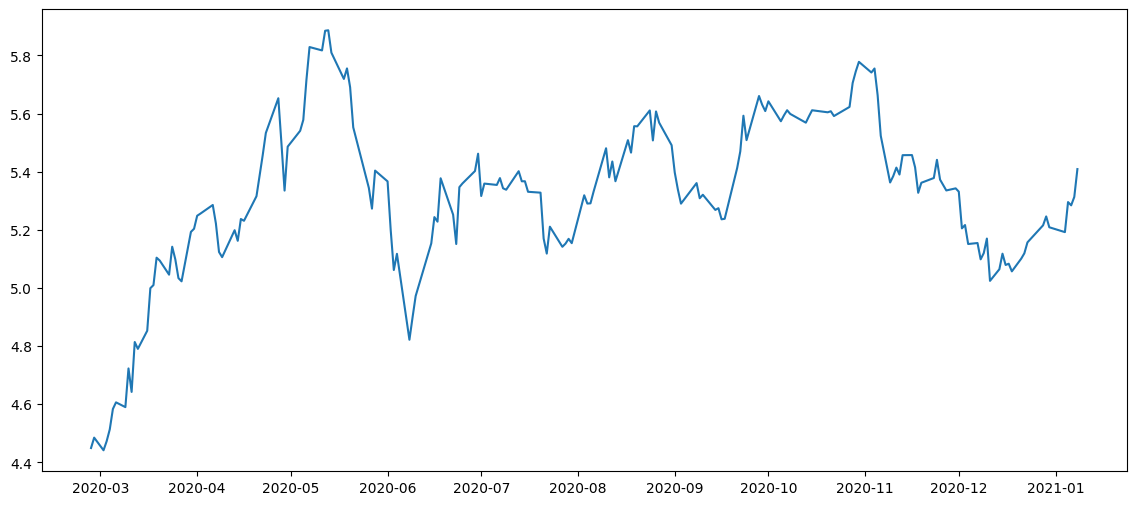

In [ ]:
fig, ax= plt.subplots(figsize=(14,6))
ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

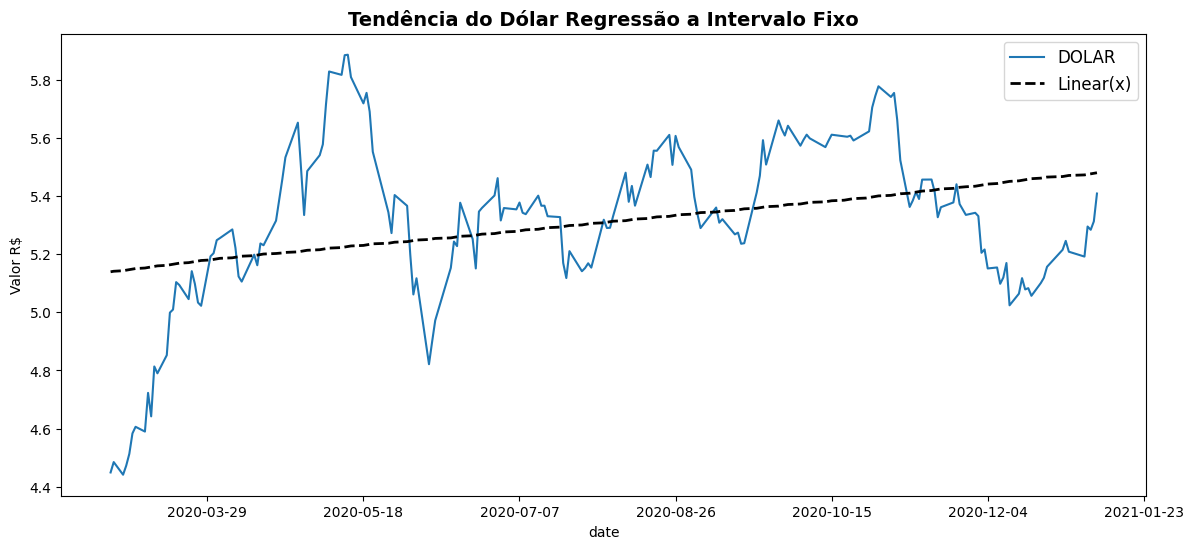

In [ ]:
fig, ax= plt.subplots(figsize=(14,6))
ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')
ax.set_title('Tendência do Dólar Regressão a Intervalo Fixo', fontsize=14, weight='bold')
ax.set_xlabel('date')
ax.set_ylabel('Valor R$')

z= np.polyfit(bovespa.index,bovespa.DOLAR,1)
p= np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.index), linestyle='dashed', label='Linear(x)', linewidth=2, color='k')

#OU
#x=np.arange(0,len(bovespa),1)
#z=np.polyfit(x,bovespa.DOLAR,1)

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

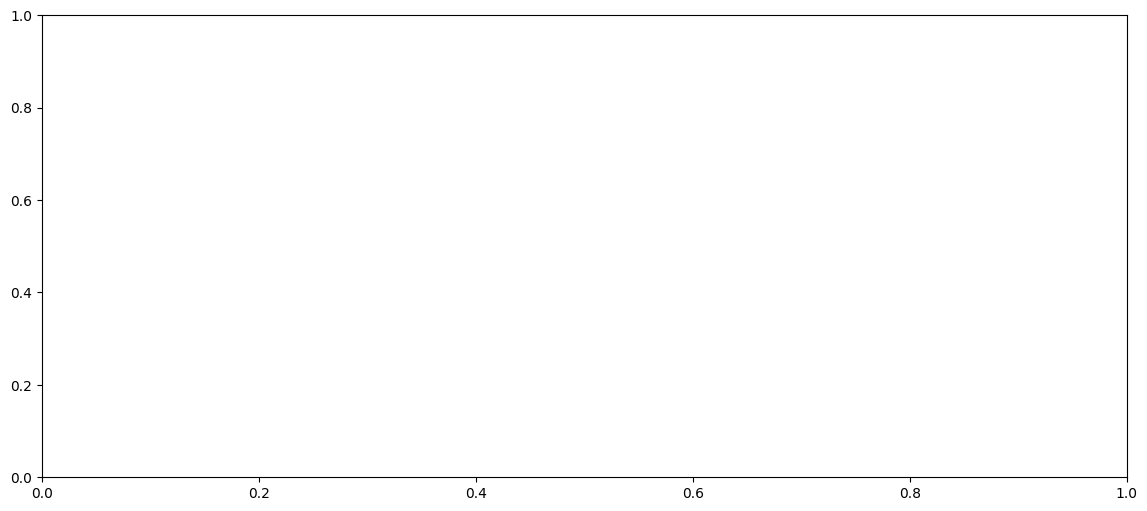

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

data_T_AA = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape.csv')
data_T_AA_mean = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape_mean.csv')



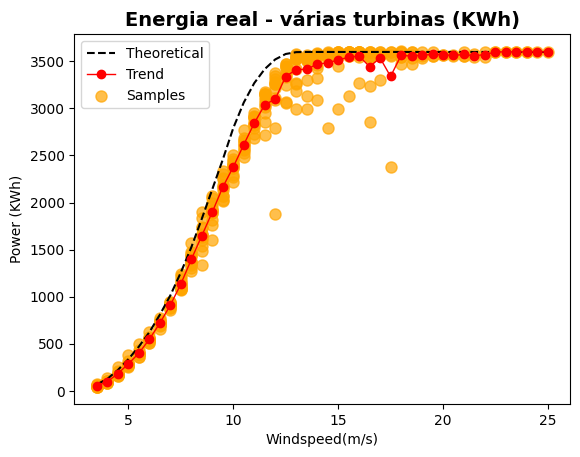

In [ ]:
plt.plot(data_T_AA_mean['WindSpeed(m/s)'],data_T_AA_mean['Theoretical_Power_Curve (KWh)'],'--k',label='Theoretical')
plt.plot(data_T_AA_mean['WindSpeed(m/s)'],data_T_AA_mean['ActivePower(kW)'],marker='o',color='r',linewidth=1,label='Trend')
plt.scatter(data_T_AA['WindSpeed(m/s)'],data_T_AA['ActivePower(kW)'],marker='o',color='orange',alpha=0.7,s=64,label='Samples')

plt.title('Energia real - várias turbinas (KWh)', fontsize=14, weight='bold')
plt.ylabel('Power (KWh)')
plt.xlabel('Windspeed(m/s)')
plt.legend()

plt.show()

In [ ]:
# bovespa['mes'] = bovespa['data'].dt.month
# bovespa['mes'] = bovespa['mes'] - 1
# bovespa.at[ bovespa['mes'] == 0 , 'mes' ] = 12 

# Desvio padrão no error plot

In [ ]:
bovespa.head()

,data,IBOV,VALE3,PETR4,DOLAR,mes
0,2020-02-27,102984.0,9.92,12.08,4.4491,1
1,2020-02-28,104172.0,9.82,12.10,4.4848,1
2,2020-03-02,106625.0,10.27,12.49,4.4413,2
3,2020-03-03,105537.0,10.22,12.16,4.4724,2
4,2020-03-04,107224.0,10.56,12.33,4.5132,2


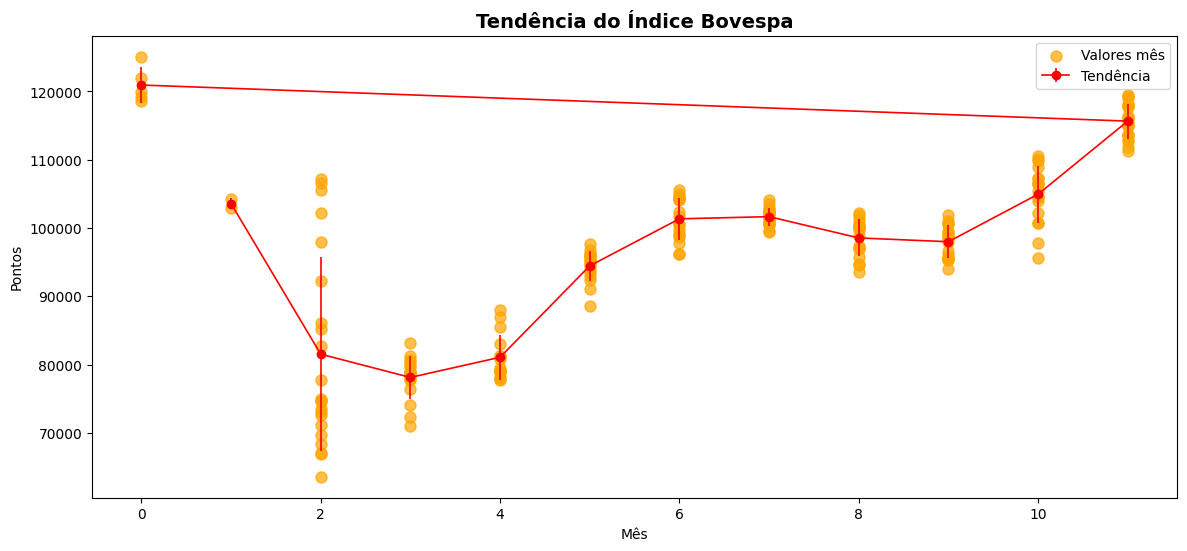

In [ ]:
fig, ax= plt.subplots(figsize=(14,6))

yerr = []
ymean = []

for mes in bovespa.mes.unique():
  yerr.append(bovespa[bovespa.mes == mes]['IBOV'].std())
  ymean.append(bovespa[bovespa.mes == mes]['IBOV'].mean())

yerr = np.array(yerr)
ymean = np.array(ymean)

plt.errorbar(bovespa.mes.unique(), ymean, yerr = yerr, label='Tendência', marker='o', color='r', linewidth=1.2)
plt.scatter(bovespa.mes, bovespa.IBOV, label='Valores mês', marker='o', color='orange', alpha=0.7, s=64)

plt.title('Tendência do Índice Bovespa', fontsize=14, weight='bold')
plt.xlabel('Mês')
plt.ylabel('Pontos')
plt.legend()
plt.show()

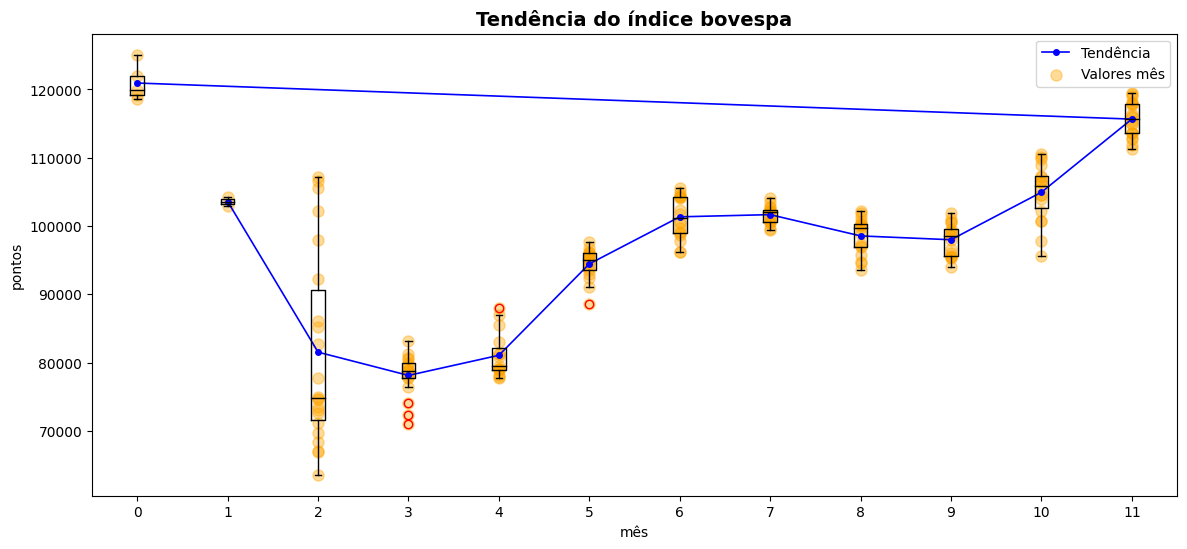

In [ ]:
fig, ax= plt.subplots(figsize=(14,6))

plt.plot(bovespa.mes.unique(), ymean, label='Tendência', marker='o', color='b', linewidth=1.2, markersize=4)
plt.scatter(bovespa.mes, bovespa.IBOV, label='Valores mês', marker='o', color='orange', alpha=0.4, s=64)

for mes in bovespa.mes.unique():
  plt.boxplot(bovespa[bovespa.mes == mes].IBOV, positions=[mes], widths=0.15, flierprops=dict(color='r',markeredgecolor='r'),medianprops=dict(color='k'))

plt.title('Tendência do índice bovespa', fontsize=14, weight='bold')
plt.xlabel('mês')
plt.ylabel('pontos')
plt.legend()
plt.show()

In [ ]:

bovespa['dias'] = bovespa['data'] - bovespa['data'].min()

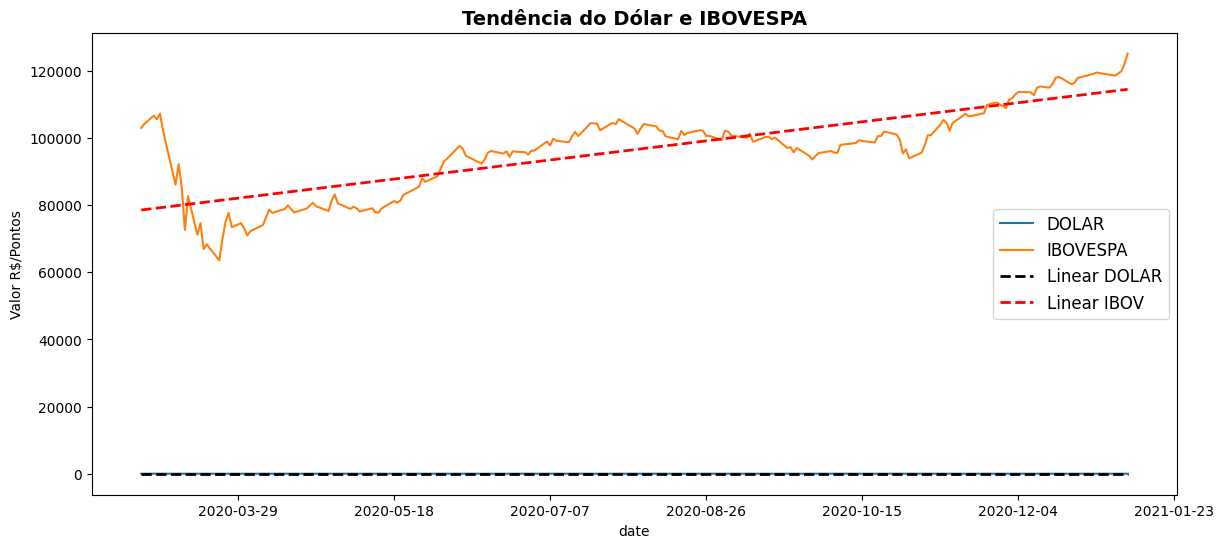

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')
ax.plot(bovespa.data, bovespa.IBOV, label='IBOVESPA')

ax.set_title('Tendência do Dólar e IBOVESPA', fontsize=14, weight='bold')
ax.set_xlabel('date')
ax.set_ylabel('Valor R$/Pontos')

z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR, 1) ##erro bovespa não tem dias?
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear DOLAR' ,linewidth=2, color='k')

z= np.polyfit(bovespa.dias.dt.days, bovespa.IBOV, 1)
p= np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear IBOV', linewidth=2, color='r')
ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

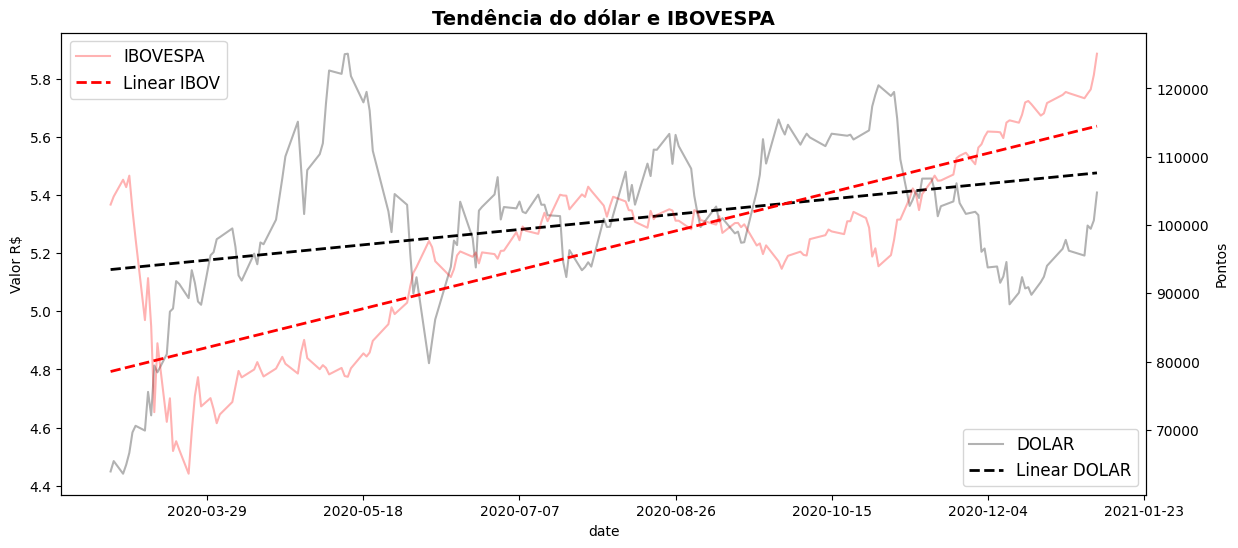

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR', color='k', alpha=0.3)

ax2= ax.twinx()

ax2.plot(bovespa.data, bovespa.IBOV, label='IBOVESPA', color='r', alpha=0.3)

ax.set_title('Tendência do dólar e IBOVESPA', fontsize=14, weight='bold')
ax.set_xlabel('date')
ax.set_ylabel('Valor R$')
ax2.set_ylabel('Pontos')

z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR, 1) ##erro bovespa não tem dias?
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear DOLAR' ,linewidth=2, color='k')

z = np.polyfit(bovespa.dias.dt.days,bovespa.IBOV,1)
p = np.poly1d(z)
ax2.plot(bovespa.data, p(bovespa.dias.dt.days), linestyle='dashed', label='Linear IBOV', linewidth=2, color='r')

ax.legend(loc='lower right', fontsize=12)
ax2.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

In [ ]:
bovespa_norm = ( bovespa.drop(columns=['data','dias']) - bovespa.drop(columns=['data','dias']).mean() ) / bovespa.drop(columns=['data', 'dias']).std()
bovespa_norm = pd.concat([bovespa[['data','dias']], bovespa_norm], axis=1)

In [ ]:
bovespa_norm.head()

,data,dias,IBOV,VALE3,PETR4,DOLAR,mes
0,2020-02-27,0 days,0.488931,-0.464186,2.132811,-3.018888,-1.669758
1,2020-02-28,1 days,0.578304,-0.500953,2.144005,-2.893685,-1.669758
2,2020-03-02,4 days,0.762844,-0.335505,2.362293,-3.046244,-1.352281
3,2020-03-03,5 days,0.680993,-0.353888,2.177588,-2.937172,-1.352281
4,2020-03-04,6 days,0.807907,-0.228884,2.272739,-2.794083,-1.352281


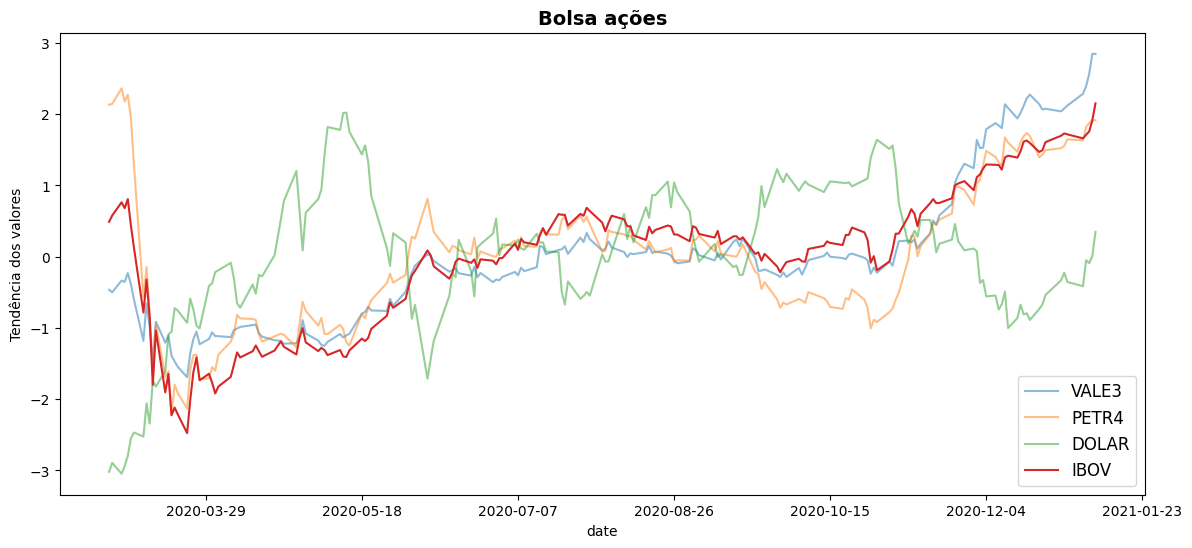

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa_norm.data, bovespa_norm.VALE3, label='VALE3', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.PETR4, label='PETR4', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.DOLAR, label='DOLAR', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.IBOV, label='IBOV')

ax.set_title('Bolsa ações', fontsize=14, weight='bold')
ax.set_xlabel('date')
ax.set_ylabel('Tendência dos valores')
ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

<ipython-input-51-34249ec77813>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


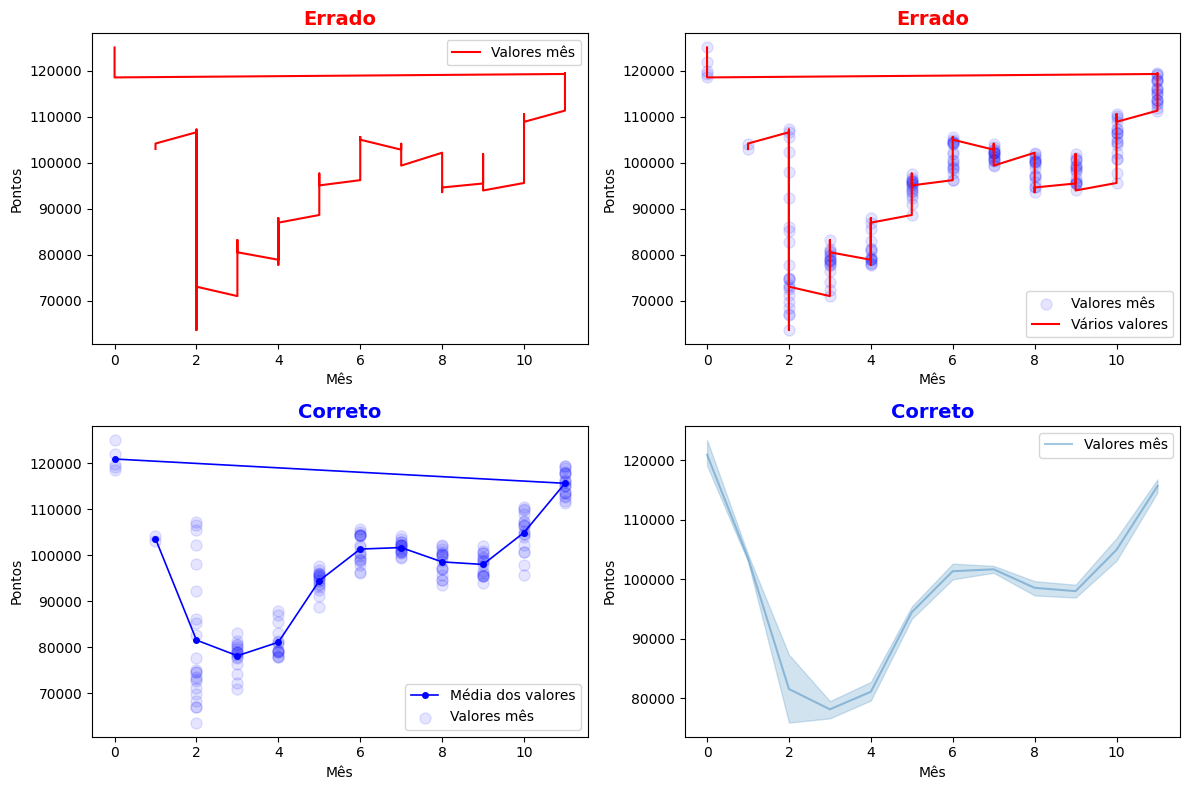

In [ ]:
##cuidados do plt.plot()

import seaborn as sns
fig, ax= plt.subplots(figsize=(12,8),sharex=True,sharey=True)

plt.subplot(2,2,1)
plt.plot(bovespa.mes, bovespa.IBOV, label='Valores mês', color='r')
plt.title('Errado', fontsize=14, weight='bold', color='r')
plt.xlabel('Mês')
plt.ylabel('Pontos')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(bovespa.mes, bovespa.IBOV, label='Valores mês', marker='o', color='b', alpha=0.1, s=64)
plt.plot(bovespa.mes, bovespa.IBOV, label='Vários valores', color='r')

plt.title('Errado', fontsize=14, weight='bold', color='r')
plt.xlabel('Mês')
plt.ylabel('Pontos')
plt.legend()

plt.subplot(2,2,3)
plt.plot(bovespa.mes.unique(), ymean, label='Média dos valores', marker='o', color='b', linewidth=1.2, markersize=4)
plt.scatter(bovespa.mes, bovespa.IBOV, label='Valores mês', marker='o', color='b', alpha=0.1, s=64)

plt.title('Correto', fontsize=14, weight='bold', color='b')
plt.xlabel('Mês')
plt.ylabel('Pontos')
plt.legend()

plt.subplot(2,2,4)
sns.lineplot(x=bovespa.mes, y=bovespa.IBOV, label='Valores mês', alpha=0.4)

plt.title('Correto', fontsize=14, weight='bold', color='b')
plt.xlabel('Mês')
plt.ylabel('Pontos')
plt.legend()

plt.tight_layout()
plt.show()